Data Analytics Project 

Team :

Suhail  - PES1UG19CS513

Shreyas - PES1UG19CS464

Srikar  - PES1UG19CS505



DATASET

source : Kaggle



Ref link : https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline

og link: https://www.kaggle.com/yanpapadakis/credit-risk-model-gbm


Problem Statement: 
Check DOC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

let the dataset name be ##dfile.csv## and store the dataset in your drive . please dont save it in any folders. mount the drive and paste.

In [ ]:
filepath = '/content/drive/MyDrive/dfile.csv'      # example . mount your drive and browse for your file in the menu and get loaction 
 
df = pd.read_csv(filepath,encoding='latin',low_memory=False) #to be used with this specific dataset

In [ ]:
#Initial dataset
print(df)

              id  member_id  loan_amnt  ...  total_cu_tl  inq_last_12m default_ind
0        1077501    1296599       5000  ...          NaN           NaN           0
1        1077430    1314167       2500  ...          NaN           NaN           1
2        1077175    1313524       2400  ...          NaN           NaN           0
3        1076863    1277178      10000  ...          NaN           NaN           0
4        1075358    1311748       3000  ...          NaN           NaN           0
...          ...        ...        ...  ...          ...           ...         ...
855964  36371250   39102635      10000  ...          NaN           NaN           0
855965  36441262   39152692      24000  ...          NaN           NaN           0
855966  36271333   38982739      13000  ...          NaN           NaN           0
855967  36490806   39222577      12000  ...          NaN           NaN           0
855968  36271262   38982659      20000  ...          NaN           NaN           0

[85

In [ ]:
#Finding missing values
columns=list(df)  #all columns
too_many_missing=[]
for i in columns:
  count=df[i].isnull().sum()
  print(i,count)
  if count>200000:
    too_many_missing.append((i,count))

id 0
member_id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 49443
emp_length 43061
home_ownership 0
annual_inc 0
verification_status 0
issue_d 0
pymnt_plan 0
desc 734157
purpose 0
title 33
zip_code 0
addr_state 0
dti 0
delinq_2yrs 0
earliest_cr_line 0
inq_last_6mths 0
mths_since_last_delinq 439812
mths_since_last_record 724785
open_acc 0
pub_rec 0
revol_bal 0
revol_util 446
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 8862
last_pymnt_amnt 0
next_pymnt_d 252971
last_credit_pull_d 50
collections_12_mths_ex_med 56
mths_since_last_major_derog 642830
policy_code 0
application_type 0
annual_inc_joint 855527
dti_joint 855529
verification_status_joint 855527
acc_now_delinq 0
tot_coll_amt 67313
tot_cur_bal 67313
open_acc_6m 842681
open_il_6m 842681
open_il_12m 842681
open_il_24m 

In [ ]:
#Too many missing values
for i in too_many_missing:
  print(i[0],i[1])

desc 734157
mths_since_last_delinq 439812
mths_since_last_record 724785
next_pymnt_d 252971
mths_since_last_major_derog 642830
annual_inc_joint 855527
dti_joint 855529
verification_status_joint 855527
open_acc_6m 842681
open_il_6m 842681
open_il_12m 842681
open_il_24m 842681
mths_since_rcnt_il 843035
total_bal_il 842681
il_util 844360
open_rv_12m 842681
open_rv_24m 842681
max_bal_bc 842681
all_util 842681
inq_fi 842681
total_cu_tl 842681
inq_last_12m 842681


In [ ]:
#Dropping columns with too many missing values
drop_cols=[]
for i in too_many_missing:
  drop_cols.append(i[0])
for i in drop_cols:
    df.drop(i,axis='columns',inplace=True)
print(df)
print(df.isnull().sum())

              id  member_id  ...  total_rev_hi_lim  default_ind
0        1077501    1296599  ...               NaN            0
1        1077430    1314167  ...               NaN            1
2        1077175    1313524  ...               NaN            0
3        1076863    1277178  ...               NaN            0
4        1075358    1311748  ...               NaN            0
...          ...        ...  ...               ...          ...
855964  36371250   39102635  ...           17100.0            0
855965  36441262   39152692  ...           10200.0            0
855966  36271333   38982739  ...           18000.0            0
855967  36490806   39222577  ...           27000.0            0
855968  36271262   38982659  ...           41700.0            0

[855969 rows x 51 columns]
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                    

In [ ]:
#Replace by "unknown"
df["last_pymnt_d"].fillna("Unknown", inplace = True)
df["last_credit_pull_d"].fillna("Unknown", inplace = True)
print(df["last_pymnt_d"].isnull().sum())
print(df["last_credit_pull_d"].isnull().sum())

0
0


In [ ]:
#Replace categorical columns by MODE
category_columns=['emp_title','emp_length','title','collections_12_mths_ex_med']

for col in category_columns:
  df[col] = df[col].fillna(df[col].mode()[0])

for col in category_columns:
  print(df[col].isnull().sum())

0
0
0
0


In [ ]:
#Replace quantitative variables by MEAN
integer_columns=['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','revol_util']
for col in integer_columns:
  df[col] = df[col].fillna(df[col].mean())

for col in integer_columns:
  print(df[col].isnull().sum())

0
0
0
0


In [ ]:
#OUTLIERS
quantitative=[]
qualitative=[]
for col in df:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    quantitative.append(col)
  else:
      qualitative.append(col)
quantitative.remove('id')
quantitative.remove('member_id')
#print(qualitative)
#print(quantitative)


count         855969
unique             2
top        36 months
freq          600221
Name: term, dtype: object
term  Missing Rate = 0.00%


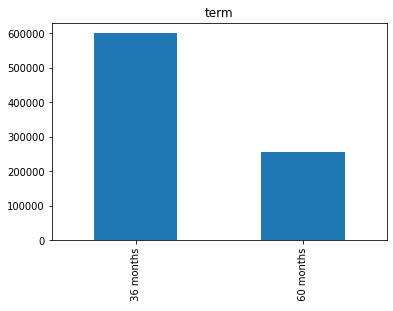

count     855969
unique         7
top            B
freq      247998
Name: grade, dtype: object
grade  Missing Rate = 0.00%


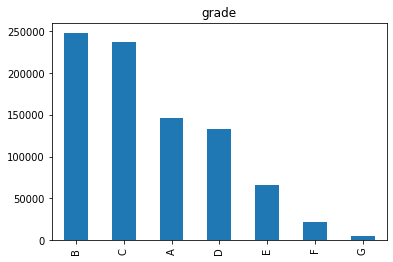

count     855969
unique        35
top           B3
freq       54958
Name: sub_grade, dtype: object
sub_grade  Missing Rate = 0.00%


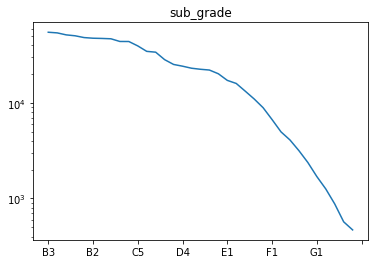

count      855969
unique     290910
top       Teacher
freq        62408
Name: emp_title, dtype: object
emp_title  Missing Rate = 0.00%


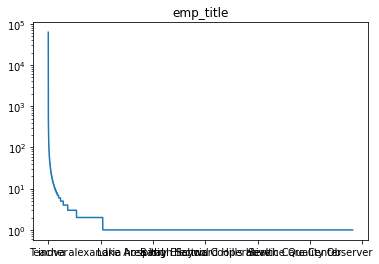

count        855969
unique           11
top       10+ years
freq         325151
Name: emp_length, dtype: object
emp_length  Missing Rate = 0.00%


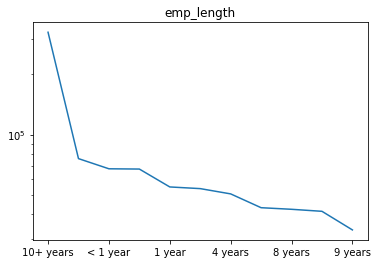

count       855969
unique           6
top       MORTGAGE
freq        429106
Name: home_ownership, dtype: object
home_ownership  Missing Rate = 0.00%


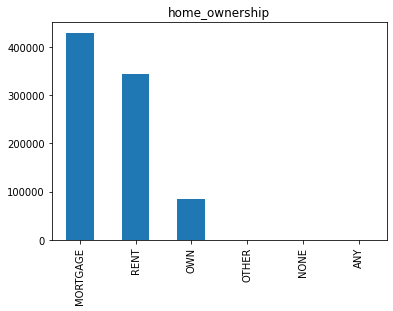

count              855969
unique                  3
top       Source Verified
freq               318178
Name: verification_status, dtype: object
verification_status  Missing Rate = 0.00%


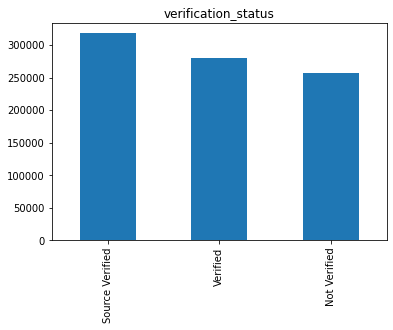

count     855969
unique       103
top       Oct-15
freq       48212
Name: issue_d, dtype: object
issue_d  Missing Rate = 0.00%


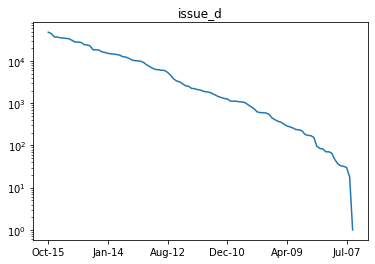

count     855969
unique         2
top            n
freq      855964
Name: pymnt_plan, dtype: object
pymnt_plan  Missing Rate = 0.00%


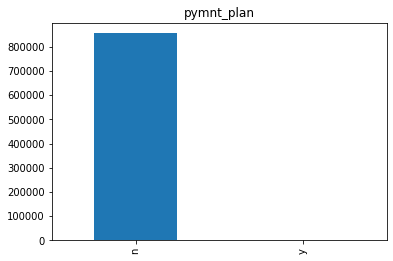

count                 855969
unique                    14
top       debt_consolidation
freq                  505392
Name: purpose, dtype: object
purpose  Missing Rate = 0.00%


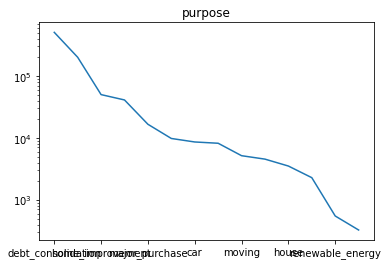

count                 855969
unique                 60954
top       Debt consolidation
freq                  398122
Name: title, dtype: object
title  Missing Rate = 0.00%


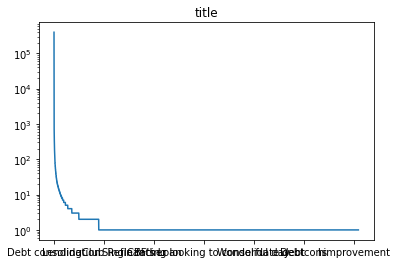

count     855969
unique       931
top        945xx
freq        9466
Name: zip_code, dtype: object
zip_code  Missing Rate = 0.00%


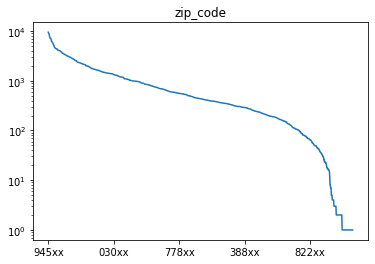

count     855969
unique        51
top           CA
freq      125172
Name: addr_state, dtype: object
addr_state  Missing Rate = 0.00%


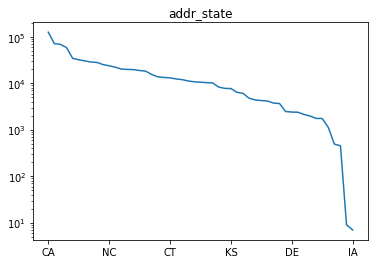

count     855969
unique       697
top       Aug-01
freq        6433
Name: earliest_cr_line, dtype: object
earliest_cr_line  Missing Rate = 0.00%


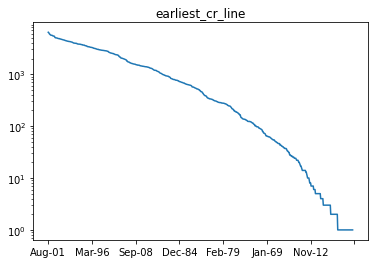

count     855969
unique         2
top            f
freq      442555
Name: initial_list_status, dtype: object
initial_list_status  Missing Rate = 0.00%


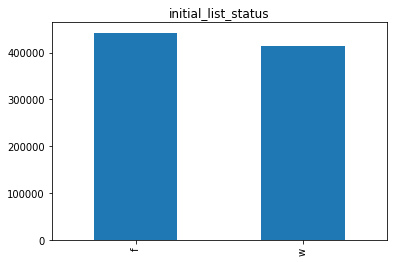

count     855969
unique        98
top       Jan-16
freq      467510
Name: last_pymnt_d, dtype: object
last_pymnt_d  Missing Rate = 0.00%


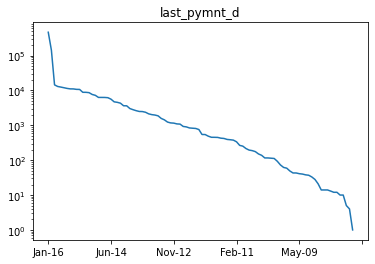

count     855969
unique       103
top       Jan-16
freq      701687
Name: last_credit_pull_d, dtype: object
last_credit_pull_d  Missing Rate = 0.00%


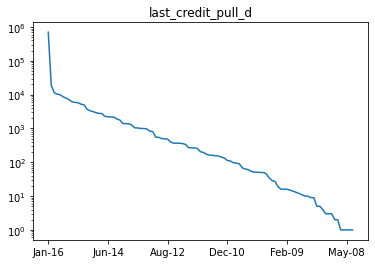

count         855969
unique             2
top       INDIVIDUAL
freq          855527
Name: application_type, dtype: object
application_type  Missing Rate = 0.00%


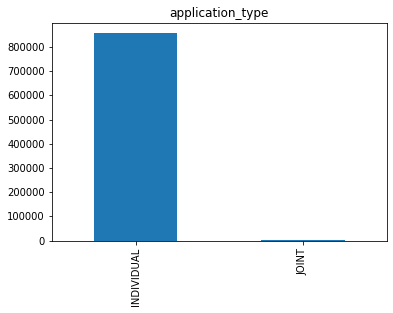

In [ ]:
import matplotlib.pyplot as plt
col_levels = dict()
nrows = len(df)
for col in qualitative:
    sm = df[col].describe()
    col_levels[col] = sm['unique']
    print(sm)
    print(col,' Missing Rate = {:.2%}'.format(1-df[col].count()/nrows))
    if col_levels[col] < 8:
        df[col].value_counts().plot.bar(title=col)
    else:
        df[col].value_counts().plot(logy=True, title=col)
    plt.show()

In [ ]:
arr=[]
for i in quantitative:
  count=len(df[i].unique())
  if count<10:
    arr.append((i,count))
print(arr)
arr.remove(('policy_code',1))

[('inq_last_6mths', 9), ('policy_code', 1), ('acc_now_delinq', 8), ('default_ind', 2)]


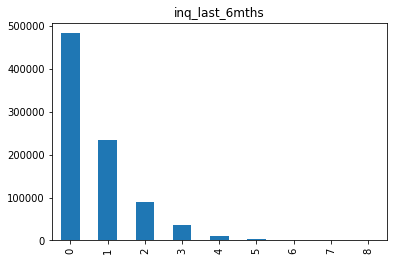

In [ ]:
col=[]
for i in arr:
  col.append(i[0])
df[col[0]].value_counts().plot.bar(title=col[0])

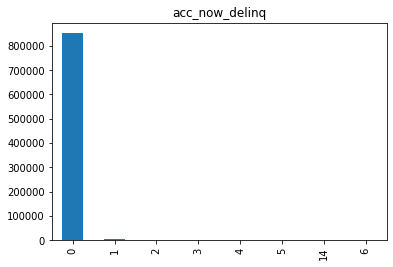

In [ ]:
df[col[1]].value_counts().plot.bar(title=col[1])

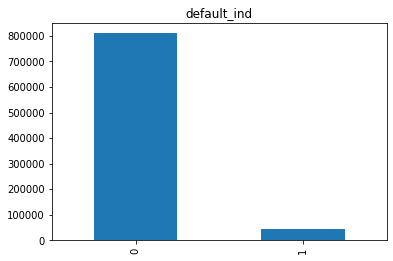

In [ ]:
df[col[2]].value_counts().plot.bar(title=col[2])

loan_amnt


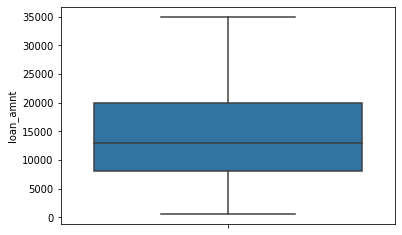

funded_amnt


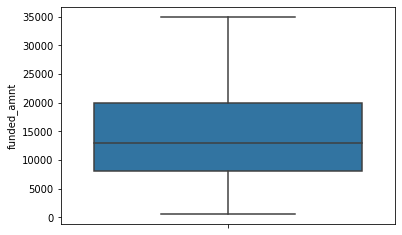

funded_amnt_inv


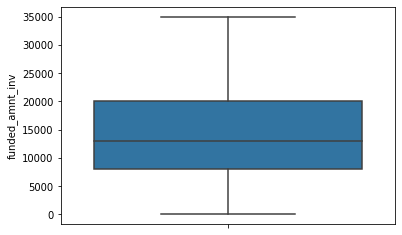

int_rate


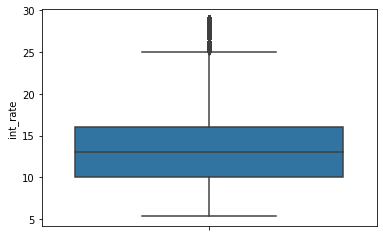

installment


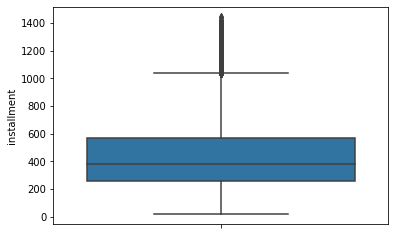

annual_inc


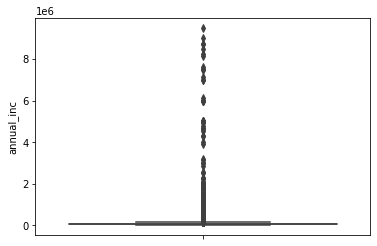

dti


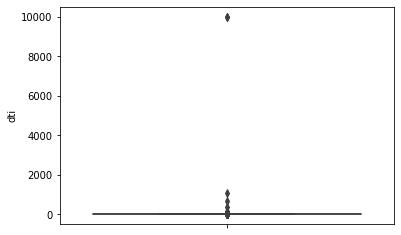

delinq_2yrs


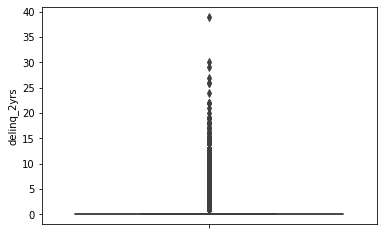

inq_last_6mths


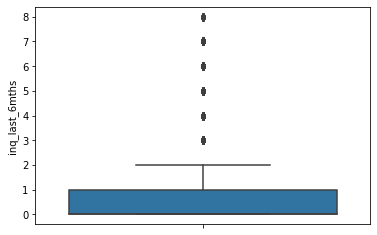

open_acc


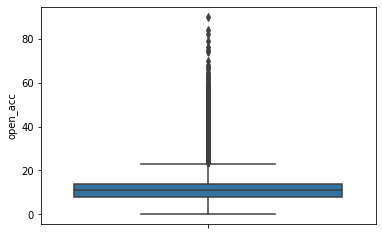

pub_rec


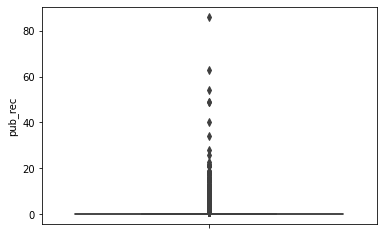

revol_bal


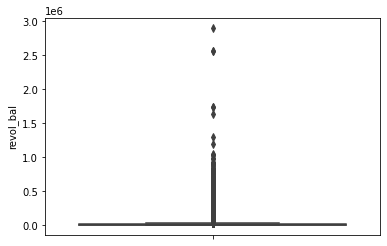

revol_util


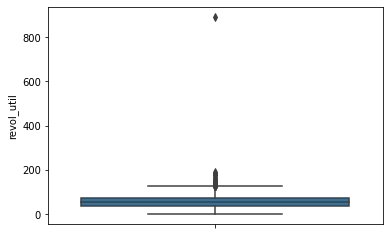

total_acc


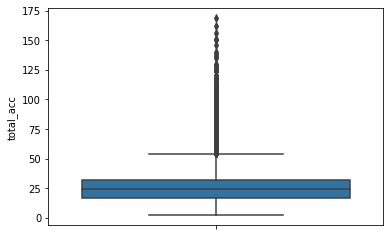

out_prncp


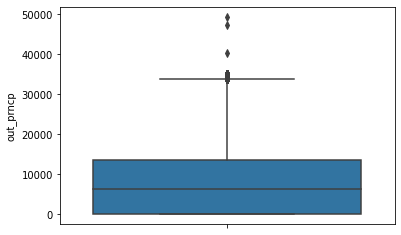

out_prncp_inv


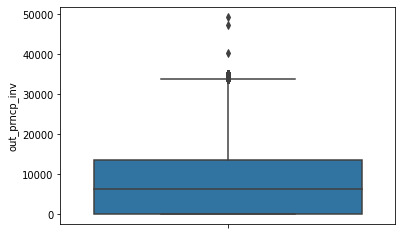

total_pymnt


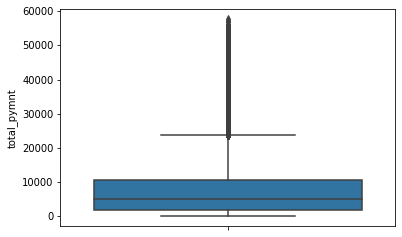

total_pymnt_inv


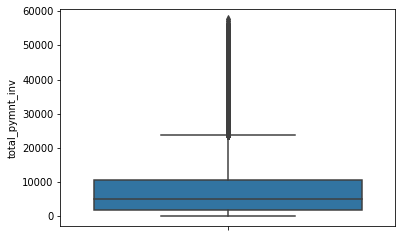

total_rec_prncp


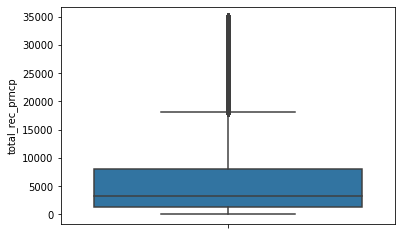

total_rec_int


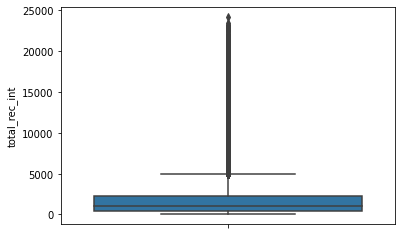

total_rec_late_fee


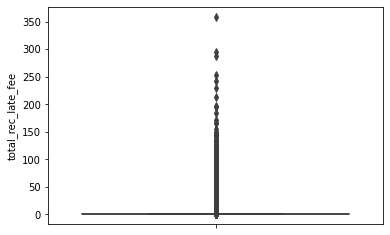

recoveries


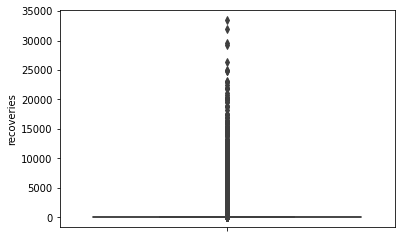

collection_recovery_fee


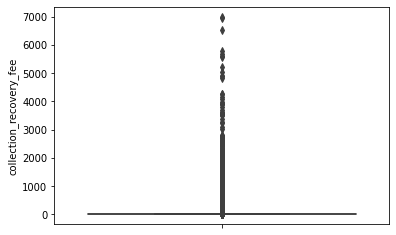

last_pymnt_amnt


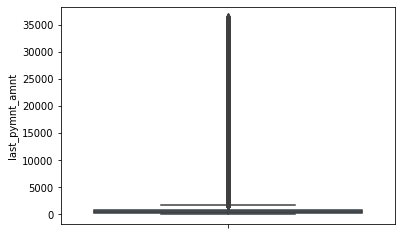

collections_12_mths_ex_med


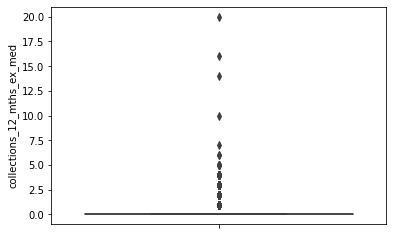

policy_code


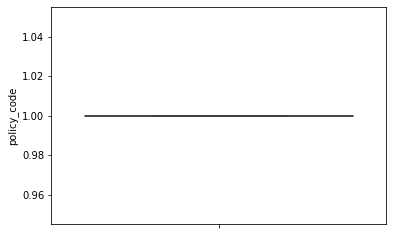

acc_now_delinq


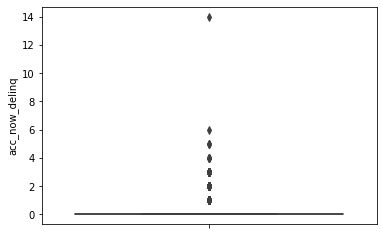

tot_coll_amt


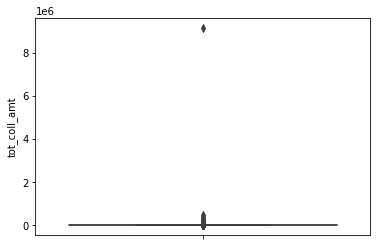

tot_cur_bal


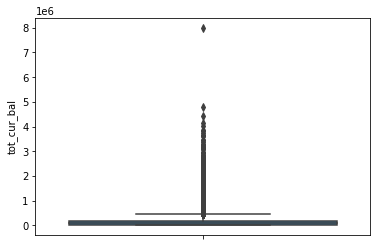

total_rev_hi_lim


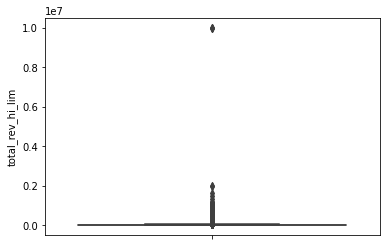

default_ind


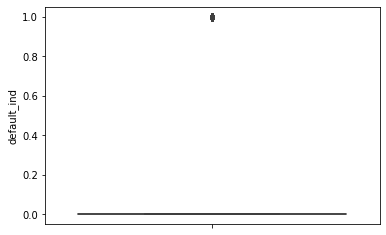

In [ ]:
#OUTLIERS DETECTION 
# We haven't removed any outliers as they might give us meaningful insights
import seaborn as sns 
for col in quantitative:
  print(col)
  ax = sns.boxplot(y=col, data=df)
  plt.show()

In [ ]:
#SHREYAS BHAKTARAM
#INCOMPLETE INCONSISTENT DUPLICATE INCORRECT
duplicate = df[df.duplicated(keep='last')]
duplicate


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [ ]:
#Get all numeric data columns
cols = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]
#Checking for negative values
for col in cols:
  df[(df[col]<0)]

#Checking max values of the columns to put upper bound limit
max_values = {}
for col in cols:
  max_values[col] = df[col].max()
max_values

{'acc_now_delinq': 14,
 'annual_inc': 9500000.0,
 'collection_recovery_fee': 7002.19,
 'collections_12_mths_ex_med': 20.0,
 'default_ind': 1,
 'delinq_2yrs': 39,
 'dti': 9999.0,
 'funded_amnt': 35000,
 'funded_amnt_inv': 35000.0,
 'id': 68616867,
 'inq_last_6mths': 8,
 'installment': 1445.46,
 'int_rate': 28.99,
 'last_pymnt_amnt': 36475.59,
 'loan_amnt': 35000,
 'member_id': 73519693,
 'open_acc': 90,
 'out_prncp': 49372.86,
 'out_prncp_inv': 49372.86,
 'policy_code': 1,
 'pub_rec': 86,
 'recoveries': 33520.27,
 'revol_bal': 2904836,
 'revol_util': 892.3,
 'tot_coll_amt': 9152545.0,
 'tot_cur_bal': 8000078.0,
 'total_acc': 169,
 'total_pymnt': 57777.57987,
 'total_pymnt_inv': 57777.58,
 'total_rec_int': 24205.62,
 'total_rec_late_fee': 358.68,
 'total_rec_prncp': 35000.03,
 'total_rev_hi_lim': 9999999.0}

In [ ]:
#Dropping rows have any missing values
nullData = df[df.isnull().values.any(axis=1)]
nullData

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [ ]:
#Dimensionality reduction using PCA
from numpy import mean
from numpy import std
from sklearn.decomposition import PCA


redDf = df.select_dtypes(include = [np.number])
copy = redDf.copy()
#Normalize the data
for column in copy.columns:
   copy[column] = copy[column]  / copy[column].abs().max()

#Fit the model with the dataset and apply the dimensionality reduction on it.
pca = PCA()
pca.fit(copy)

columns = ['pca_%i' % i for i in range(33)]
df_pca = pd.DataFrame(pca.transform(copy), columns=columns, index=df.index)

print(pca.explained_variance_ratio_)

#steps = [('norm', MinMaxScaler()), ('pca', PCA()), ('m', LogisticRegression())]
#model = Pipeline(steps=steps)
#model
#transformed = pca.transform(redDf)
#steps = [('pca', PCA()), ('m', LogisticRegression())]
#model = Pipeline(steps=steps)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


[4.09846632e-01 3.57917836e-01 8.61120344e-02 5.90337300e-02
 3.49032346e-02 1.95687487e-02 9.78566584e-03 9.22698362e-03
 4.73524149e-03 2.17274506e-03 1.82488571e-03 1.66521077e-03
 9.26053444e-04 6.93410858e-04 4.12870410e-04 2.94791076e-04
 2.40396818e-04 1.45301736e-04 9.05332224e-05 7.15393407e-05
 6.58976371e-05 6.45453775e-05 6.03370130e-05 4.97724579e-05
 4.41339183e-05 3.01203181e-05 7.01424550e-06 4.29534595e-06
 4.12938234e-06 1.79204844e-06 1.17132880e-07 2.14208556e-16
 2.83039934e-33]


In [ ]:
#CORRELATION MATRIX
df.corr().style.background_gradient(cmap='Reds')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
id,1.000000,0.999431,0.062971,0.065192,0.069491,-0.143769,0.023647,0.034160,0.066580,0.049909,-0.118742,0.089238,0.080289,0.039686,-0.053523,0.031148,0.561560,0.561523,-0.593428,-0.589995,-0.553231,-0.457397,-0.075917,-0.115269,-0.073399,-0.228774,0.050928,nan,0.016849,0.003875,0.006647,0.043947,-0.219832
member_id,0.999431,1.000000,0.063603,0.065862,0.070248,-0.142996,0.024311,0.034338,0.066620,0.050174,-0.118790,0.089345,0.080976,0.039704,-0.053247,0.031311,0.561980,0.561943,-0.592951,-0.589419,-0.552938,-0.456508,-0.076341,-0.115341,-0.073358,-0.228243,0.051045,nan,0.016960,0.003892,0.006645,0.043744,-0.220181
loan_amnt,0.062971,0.063603,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.020189,-0.000739,-0.028928,0.198926,-0.082199,0.337489,0.119591,0.222084,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.025966,0.075513,0.055135,0.233596,-0.017034,nan,0.003572,-0.004107,0.316383,0.299986,-0.004907
funded_amnt,0.065192,0.065862,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.020583,-0.000424,-0.029279,0.199432,-0.081858,0.337405,0.120104,0.222039,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.025579,0.075076,0.054898,0.233134,-0.016879,nan,0.003675,-0.004109,0.316602,0.300194,-0.005797
funded_amnt_inv,0.069491,0.070248,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.021489,0.000050,-0.030462,0.200055,-0.081008,0.336870,0.120886,0.222258,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.023091,0.073737,0.053082,0.232029,-0.016543,nan,0.003856,-0.004104,0.316262,0.299884,-0.008209
int_rate,-0.143769,-0.142996,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.078454,0.055400,0.231705,-0.011091,0.052596,-0.035344,0.271604,-0.039482,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.050743,0.110848,0.074360,0.107346,0.012846,nan,0.026476,0.001089,-0.088206,-0.159695,0.155037
installment,0.023647,0.024311,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.013909,0.007224,0.001659,0.183817,-0.071114,0.320017,0.131877,0.199872,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.035728,0.076931,0.057180,0.243246,-0.014558,nan,0.006273,-0.003400,0.286575,0.275535,0.004753
annual_inc,0.034160,0.034338,0.335209,0.335002,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.047749,0.037251,0.139429,-0.008909,0.298569,0.036737,0.188651,0.211549,0.211591,0.163226,0.163275,0.152245,0.130367,0.009864,0.007613,0.006805,0.092662,-0.003790,nan,0.014877,0.000974,0.409668,0.262754,-0.037066
dti,0.066580,0.066620,0.020189,0.020583,0.021489,0.078454,0.013909,-0.086821,1.000000,-0.002677,-0.005860,0.142068,-0.022717,0.067119,0.086642,0.106266,0.058057,0.058021,-0.040537,-0.039563,-0.050855,0.008750,-0.006245,0.001719,0.002923,-0.028601,-0.000113,nan,0.003227,-0.001979,-0.007072,0.032157,0.004429
delinq_2yrs,0.049909,0.050174,-0.000739,-0.000424,0.000050,0.055400,0.007224,0.047749,-0.002677,1.000000,0.022930,0.051502,-0.011081,-0.031807,-0.016289,0.121978,0.030884,0.030874,-0.031777,-0.031346,-0.038068,0.001380,0.013992,-0.000252,0.001467,-0.018805,0.063019,nan,0.130420,0.000151,0.063602,-0.039936,-0.009186


In [ ]:
#Finding Point-Biserial correlation coefficient
from scipy import stats
stats.pointbiserialr(df['recoveries'],df['default_ind'])

PointbiserialrResult(correlation=0.47573804874765474, pvalue=0.0)

(0.0, 43052.401137714936)

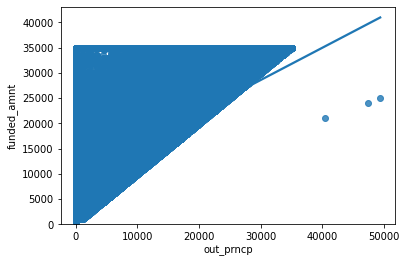

In [ ]:
"""cor=df.corr()
for col in df:
  cor_target = abs(cor[col])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.5]
  print(relevant_features)"""

# doesnt look good we can delete !!
sns.regplot(x="out_prncp", y="funded_amnt", data=df)
plt.ylim(0,)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['out_prncp'], df['funded_amnt'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6417063804101886  with a P-value of P = 0.0


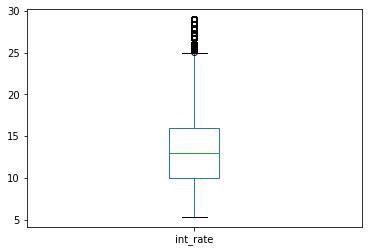

In [ ]:
#Pending vizualisations

#date vs loan_amnt
#date vs funded_amnt

df['int_rate'].plot.box()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
print(cols)
print(len(cols))
X=df[cols].drop('default_ind', axis=1)
y=df.default_ind
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')
33
(599178, 32)
(256791, 32)
(599178,)
(256791,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=400))
Pipeline=pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test) 
y_pred=pipe.predict(X_test)
score =accuracy_score(y_test,y_pred)
score

0.9975077008150597

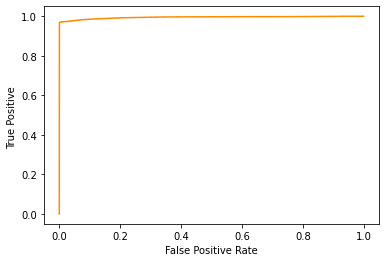

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Calculating probability scores of each point in the training set
y_train_score = pipe.decision_function(X_train)

#Calculating FPR, TPR and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

#Calculating probability scores of each point in the test set
y_test_score = pipe.decision_function(X_test)

#Calculating FPR, TPR, and thresholds for the training set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.plot(test_fpr, test_tpr, color='darkorange', label='ROC Curve')

In [ ]:
roc_auc_score(y, pipe.decision_function(X))

0.9950004732183636

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  0.9993231046931408
recall_score:  0.9546630262968817
f1_score:  0.9764826927316823


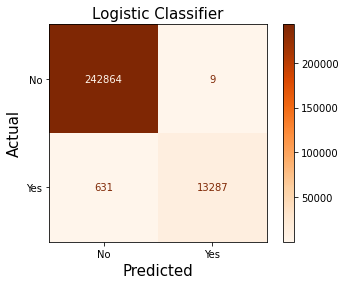

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(pipe, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('Logistic Classifier', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

In [ ]:
from sklearn.svm import SVC

svmc =make_pipeline(StandardScaler(),SVC(gamma='auto',kernel='rbf'))
svmc.fit(X_train,y_train)
svmc.score(X_test,y_test)
y_pred=svmc.predict(X_test)
score =accuracy_score(y_test,y_pred)
score


0.9971143848499363

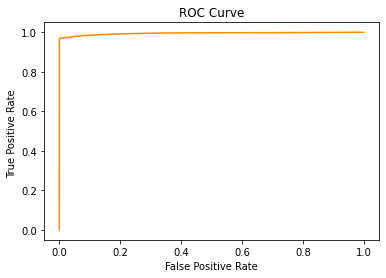

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Calculating probability scores of each point in the training set
y_train_score = svmc.decision_function(X_train)

#Calculating FPR, TPR and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

#Calculating probability scores of each point in the test set
y_test_score = pipe.decision_function(X_test)

#Calculating FPR, TPR, and thresholds for the training set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.plot(test_fpr, test_tpr, color='darkorange', label='ROC Curve')

In [ ]:
roc_auc_score(y, svmc.decision_function(X))

0.9974214211286928

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  1.0
recall_score:  0.9467595918953873
f1_score:  0.97265178077136


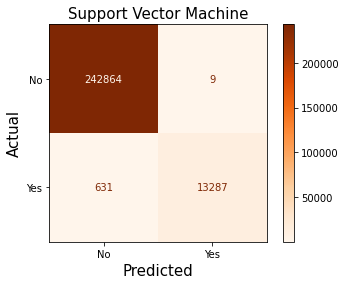

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(svmc, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('Support Vector Machine', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
score =accuracy_score(y_test,y_pred)
score

0.9498152193807415

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  0.6156607583576397
recall_score:  0.197154763615462
f1_score:  0.29866666666666664


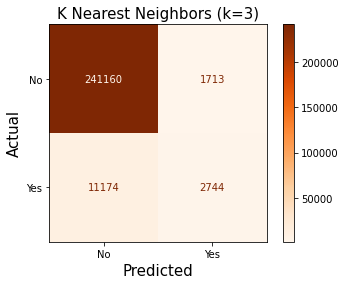

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(knn, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('K Nearest Neighbors (k=3)', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

In [ ]:
'''
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Calculating probability scores of each point in the training set
y_train_score = knn.decision_function(X_train)

#Calculating FPR, TPR and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

#Calculating probability scores of each point in the test set
y_test_score = pipe.decision_function(X_test)

#Calculating FPR, TPR, and thresholds for the training set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.plot(test_fpr, test_tpr, color='darkorange', label='ROC Curve')
'''


AttributeError: ignored

In [ ]:
#roc_auc_score(y, knn.decision_function(X))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9513144931091821

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  0.7677760968229954
recall_score:  0.1458542894093979
f1_score:  0.24513947590870666


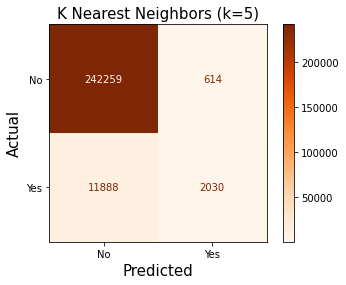

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(knn, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('K Nearest Neighbors (k=5)', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9497061812914004

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  0.9665116279069768
recall_score:  0.07465153039229774
f1_score:  0.1385980124057894


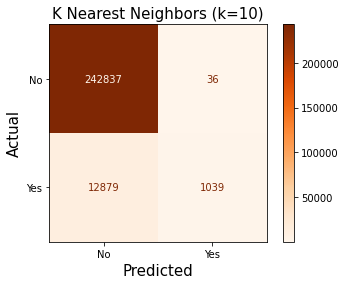

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(knn, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('K Nearest Neighbors (k=10)', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

#Cross validation test to find the best parameters for the model

param_range = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='min_samples_leaf', param_range=param_range, cv=4)
print("N_ESTIMATORS")
print(param_range)
print(train_scores)
print(test_scores)









N_ESTIMATORS
[1, 2, 3, 4, 5]
[[0.99999777 1.         0.99999777 0.99999777]
 [0.99885621 0.99893632 0.99882061 0.99886289]
 [0.99845566 0.99851129 0.99844231 0.99849794]
 [0.99829989 0.99834662 0.99826429 0.99837333]
 [0.9981953  0.99825984 0.99821979 0.99826874]]
[[0.99804399 0.99785707 0.99811741 0.99791046]
 [0.99798391 0.9978504  0.9980373  0.99788376]
 [0.99793051 0.99779699 0.9980373  0.99783703]
 [0.99793718 0.99780367 0.99797055 0.9977903 ]
 [0.99788377 0.99776361 0.9979839  0.9977636 ]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#rfc = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=0)
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9980567854792419


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision:  0.999553272280545
recall_score:  0.9645782440005748
f1_score:  0.9817543603056785


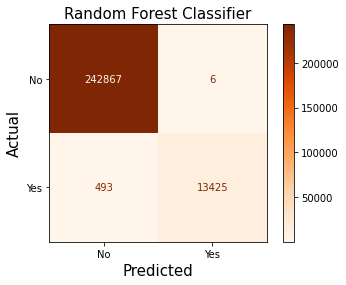

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ['No','Yes']
plot_confusion_matrix(rfc, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('Random Forest Classifier', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

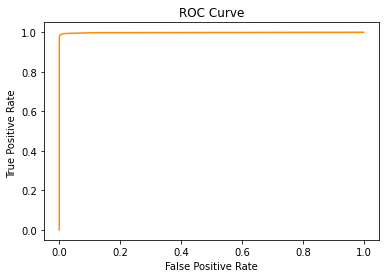

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Calculating probability scores of each point in the training set
y_train_score = rfc.predict_proba(X_train)

#Calculating FPR, TPR and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score[:,1])

#Calculating probability scores of each point in the test set
y_test_score = rfc.predict_proba(X_test)

#Calculating FPR, TPR, and thresholds for the training set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score[:,1])

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.plot(test_fpr, test_tpr, color='darkorange', label='ROC Curve')

In [ ]:
roc_auc_score(y_test, y_test_score[:,1])

0.9984122523692611